## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from palmerpenguins import load_penguins
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
hd = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1"
)

In [27]:
X = hd.drop("diagnosis", axis = 1)
y= hd["diagnosis"]

In [44]:
X = hd[["age", "chol"]]
y = hd["diagnosis"]

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

No cholesterol level exceeds a 90% probability of heart disease.


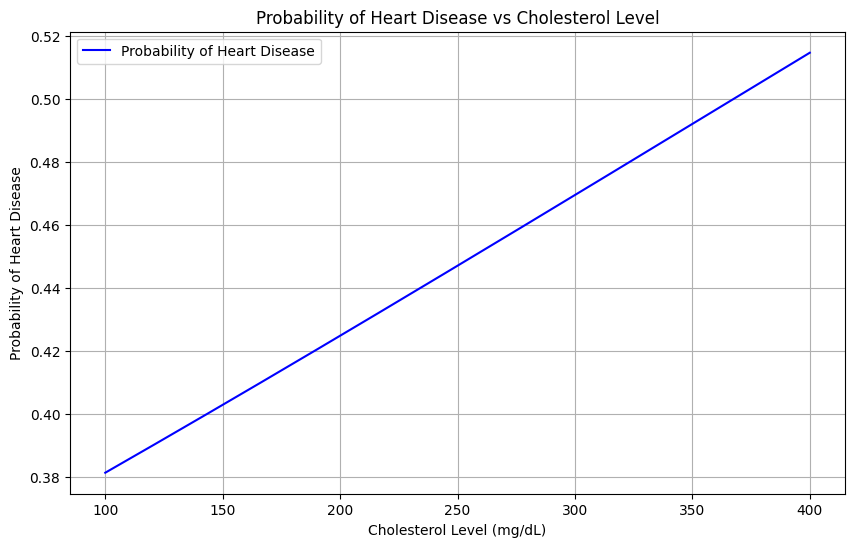

In [46]:
import matplotlib.pyplot as plt
# Define the preprocessing step for "age" and "chol"
ct_dummies = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],  # Specify only the variables to transform
    remainder="drop"  # Keep all other columns as they are
)

# Create the pipeline
lg_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("logistic_regression", LogisticRegression())]
)

# Fit the pipeline using the entire dataset (X and y)
lg_pipeline.fit(X, y)

# Extract the logistic regression model and the scaler
logistic_model = lg_pipeline.named_steps["logistic_regression"]
scaler = lg_pipeline.named_steps["preprocessing"]

# Step 2: Standardize age = 55 and cholesterol values
age = 55
chol_values = np.linspace(100, 400, 300, 564)  # Range of cholesterol values
X_input = np.column_stack([np.full(len(chol_values), age), chol_values])
X_input = pd.DataFrame(X_input, columns=["age", "chol"])  # Ensure column names are specified

# Step 3: Apply the scaler to standardize the input data
X_input_scaled = scaler.transform(X_input)

# Step 4: Predict probabilities for heart disease presence
probabilities = logistic_model.predict_proba(X_input_scaled)[:, 1]

# Step 5: Find cholesterol level where probability exceeds 90% (0.9)
indices_90 = np.where(probabilities >= 0.9)[0]

if len(indices_90) > 0:
    chol_level_90 = chol_values[indices_90[0]]
    print(f"Cholesterol level for 90% probability of heart disease: {chol_level_90:.2f} mg/dL")
else:
    print("No cholesterol level exceeds a 90% probability of heart disease.")

plt.figure(figsize=(10, 6))
plt.plot(chol_values, probabilities, label="Probability of Heart Disease", color="blue")
# plt.axvline(x=chol_level_90, color='red', linestyle='--', label=f"90% Probability at {chol_level_90:.2f} mg/dL" if chol_level_90 else "No 90% Probability")

plt.title("Probability of Heart Disease vs Cholesterol Level")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Probability of Heart Disease")
plt.legend()
plt.grid(True)
plt.show()

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the ColumnTransformer to standardize the specified variables
ct_dummies = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],  # Specify only the variables to transform
    remainder="drop"  # Keep all other columns as they are
)

# Create the pipeline with LDA
lda_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("lda", LinearDiscriminantAnalysis())]
)

# Fit the pipeline using the entire dataset (X and y)
lda_pipeline.fit(X, y)

# Extract the LDA model and the scaler
lda_model = lda_pipeline.named_steps["lda"]
scaler = lda_pipeline.named_steps["preprocessing"]

# Step 2: Standardize age = 55 and cholesterol values
age = 55
chol_values = np.linspace(100, 400, 300)  # Range of cholesterol values
X_input = np.column_stack([np.full(len(chol_values), age), chol_values])
X_input = pd.DataFrame(X_input, columns=["age", "chol"])

# Transform the input data using the pipeline preprocessing step
X_transformed = scaler.transform(X_input)

# Predict probabilities or classes using the trained LDA model
y_probs = lda_model.predict_proba(X_transformed)  # Probabilities for each class
y_pred = lda_model.predict(X_transformed)  # Predicted classes

# Display results
# print("Predicted Probabilities:", y_probs)
# print("Predicted Classes:", y_pred)


In [58]:
# Set age and cholesterol range
age = 55
chol_values = np.linspace(100, 400, 300)  # Test cholesterol values from 100 to 400

# Prepare input data
X_input = pd.DataFrame({"age": np.full(len(chol_values), age), "chol": chol_values})

# Transform input data using pipeline preprocessing
X_transformed = scaler.transform(X_input)

# Predict probabilities of heart disease for each cholesterol value
y_probs = lda_model.predict_proba(X_transformed)[:, 1]  # Probability for the "heart disease present" class

# Find the first cholesterol value where heart disease is predicted
threshold_idx = np.argmax(y_probs > 0.5)  # Index of the first occurrence where probability > 0.5
threshold_chol = chol_values[threshold_idx]  # Corresponding cholesterol value

# Output result
print(f"For a 55-year-old, heart disease is predicted when cholesterol is at least {threshold_chol:.2f}.")


For a 55-year-old, heart disease is predicted when cholesterol is at least 368.90.


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [70]:
from sklearn.svm import SVC

# Create the ColumnTransformer to standardize the specified variables
ct_dummies = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],  # Specify only the variables to transform
    remainder="drop"  # Keep all other columns as they are
)

# Create the pipeline with LDA
svc_pipeline = Pipeline(
    [("preprocessing", ct_dummies),
     ("svc", SVC(probability= True, C= 1))]
)

# Fit the pipeline using the entire dataset (X and y)
svc_pipeline.fit(X, y)

# Extract the LDA model and the scaler
svc_model = svc_pipeline.named_steps["svc"]
scaler = svc_pipeline.named_steps["preprocessing"]

# Step 2: Standardize age = 55 and cholesterol values
age = 55
chol_values = np.linspace(100, 400, 300)  # Range of cholesterol values
X_input = np.column_stack([np.full(len(chol_values), age), chol_values])
X_input = pd.DataFrame(X_input, columns=["age", "chol"])

# Transform the input data using the pipeline preprocessing step
X_transformed = scaler.transform(X_input)

# Predict probabilities or classes using the trained LDA model
y_probs = lda_model.predict_proba(X_transformed)  # Probabilities for each class
y_pred = lda_model.predict(X_transformed)  # Predicted classes

# Display results
# print("Predicted Probabilities:", y_probs)
# print("Predicted Classes:", y_pred)


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define the preprocessing step
ct_dummies = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],  # Specify only the variables to transform
    remainder="drop"  # Keep all other columns as they are
)

# Create the pipeline
svc_pipeline = Pipeline([
    ("preprocessing", ct_dummies),
    ("svc", SVC(probability=True))  # Use probability=True for probability outputs
])

# Define the parameter grid for C (regularization parameter)
param_grid = {
    "svc__C": [0.1, 1, 10, 100, 1000]  # Example values to search
}

# Perform grid search
grid_search = GridSearchCV(
    svc_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy"  # Metric to optimize
)

# Fit the grid search
grid_search.fit(X, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best Parameters: {'svc__C': 1}
Best Cross-Validation Accuracy: 0.6127


In [71]:
# Set age and cholesterol range
age = 55
chol_values = np.linspace(100, 400, 300)  # Test cholesterol values from 100 to 400

# Prepare input data
X_input = pd.DataFrame({"age": np.full(len(chol_values), age), "chol": chol_values})

# Transform input data using pipeline preprocessing
X_transformed = scaler.transform(X_input)

# Predict probabilities of heart disease for each cholesterol value
y_probs = svc_model.predict_proba(X_transformed)[:, 1]  # Probability for the "heart disease present" class

# Find the first cholesterol value where heart disease is predicted
threshold_idx = np.argmax(y_probs > 0.5)  # Index of the first occurrence where probability > 0.5
threshold_chol = chol_values[threshold_idx]  # Corresponding cholesterol value

# Output result
print(f"For a 55-year-old, heart disease is predicted when cholesterol is at least {threshold_chol:.2f}.")


For a 55-year-old, heart disease is predicted when cholesterol is at least 251.51.


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

C:\Users\hblin\AppData\Local\Temp\ipykernel_19964\2760622211.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


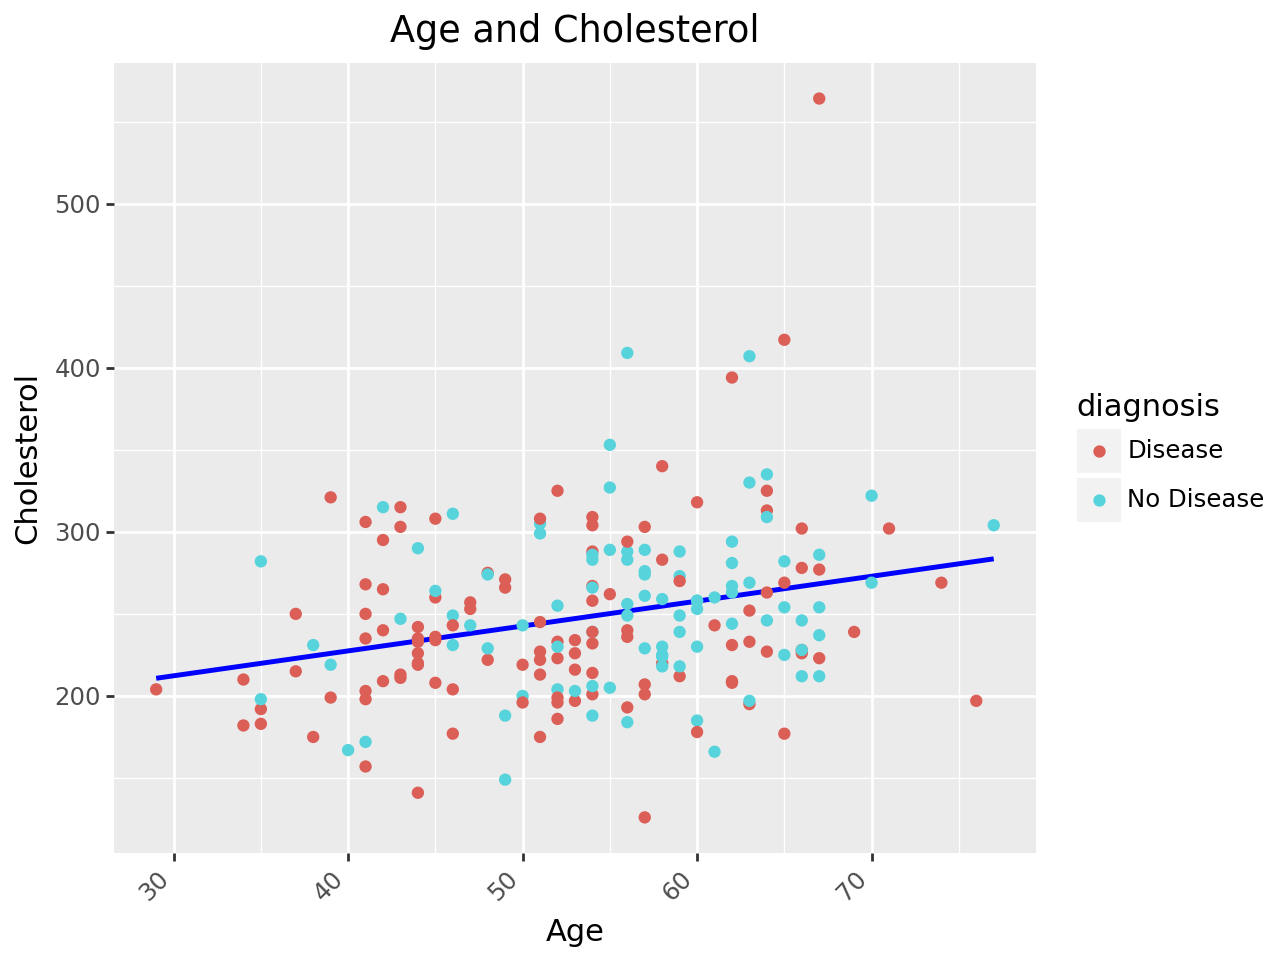

In [64]:
import plotnine as pl 
from plotnine import *
plot = (
    ggplot(hd)  # Use your DataFrame here
    + aes(x='age', y='chol', color = 'diagnosis')  # Aesthetic mappings for x and y variables
    + geom_smooth(method='lm', color='blue', se=False)
    + geom_point()  # Points plotted in red
    + labs(title='Age and Cholesterol', x='Age', y='Cholesterol')  # Adding titles and labels
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
)

# Display the plot
print(plot)

C:\Users\hblin\AppData\Local\Temp\ipykernel_19964\4214217308.py:24: UserWarning: The following kwargs were not used by contour: 'label'
C:\Users\hblin\AppData\Local\Temp\ipykernel_19964\4214217308.py:33: UserWarning: The following kwargs were not used by contour: 'label'
C:\Users\hblin\AppData\Local\Temp\ipykernel_19964\4214217308.py:42: UserWarning: The following kwargs were not used by contour: 'label'


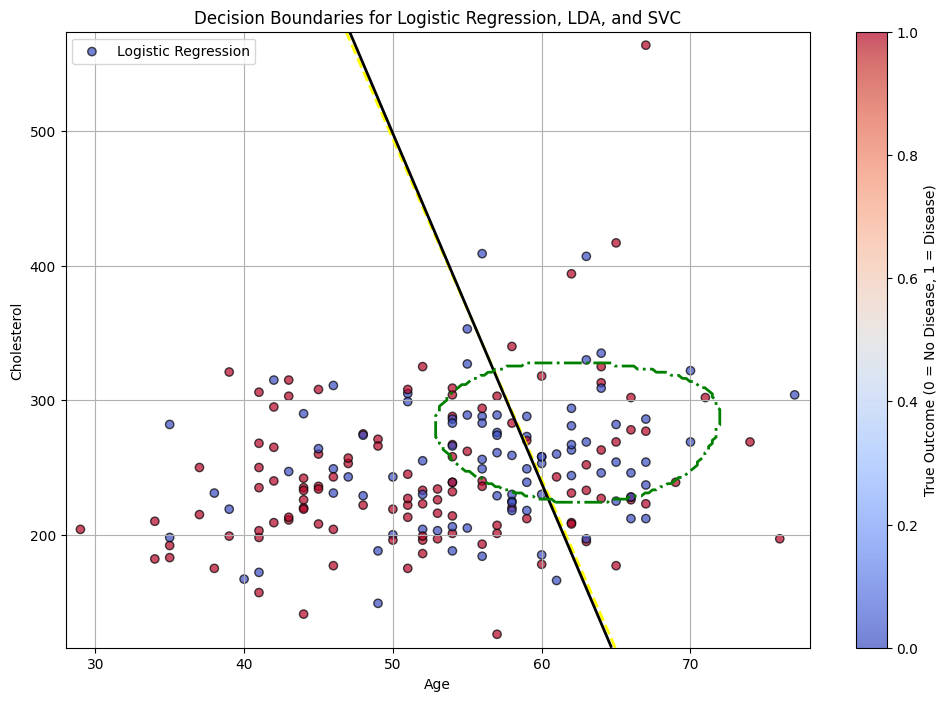

In [74]:
# Scatterplot of true data
y = y.map({"No Disease": 0, "Disease": 1})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['age'], X['chol'], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label="True Outcome (0 = No Disease, 1 = Disease)")

# Create a mesh grid for plotting decision boundaries
age_min, age_max = X['age'].min() - 1, X['age'].max() + 1
chol_min, chol_max = X['chol'].min() - 10, X['chol'].max() + 10
age_range, chol_range = np.meshgrid(
    np.linspace(age_min, age_max, 200),
    np.linspace(chol_min, chol_max, 200)
)
grid = pd.DataFrame(np.c_[age_range.ravel(), chol_range.ravel()], columns=["age", "chol"])

# Logistic Regression
lg_pipeline = Pipeline([
    ("preprocessing", ColumnTransformer([("standardize", StandardScaler(), ["age", "chol"])], remainder="drop")),
    ("logistic_regression", LogisticRegression())
])
lg_pipeline.fit(X, y)
lg_probs = lg_pipeline.predict_proba(grid)[:, 1].reshape(age_range.shape)
plt.contour(age_range, chol_range, lg_probs, levels=[0.5], colors='yellow', linewidths=2, linestyles='--', label="Logistic Regression")

# Linear Discriminant Analysis (LDA)
lda_pipeline = Pipeline([
    ("preprocessing", ColumnTransformer([("standardize", StandardScaler(), ["age", "chol"])], remainder="drop")),
    ("lda", LinearDiscriminantAnalysis())
])
lda_pipeline.fit(X, y)
lda_probs = lda_pipeline.predict_proba(grid)[:, 1].reshape(age_range.shape)
plt.contour(age_range, chol_range, lda_probs, levels=[0.5], colors='black', linewidths=2, linestyles='-', label="LDA")

# Support Vector Classifier (SVC)
svc_pipeline = Pipeline([
    ("preprocessing", ColumnTransformer([("standardize", StandardScaler(), ["age", "chol"])], remainder="drop")),
    ("svc", SVC(probability=True, C=1))
])
svc_pipeline.fit(X, y)
svc_probs = svc_pipeline.predict_proba(grid)[:, 1].reshape(age_range.shape)
plt.contour(age_range, chol_range, svc_probs, levels=[0.5], colors='green', linewidths=2, linestyles='-.', label="SVC")

# Labels and legend
plt.title("Decision Boundaries for Logistic Regression, LDA, and SVC")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(["Logistic Regression", "LDA", "SVC"])
plt.grid(True)
plt.show()
